In [ ]:
! python --version

### Download the paper "Attention is All You Need" from the following link:

In [ ]:
# ! wget https://arxiv.org/pdf/1706.03762.pdf -O ../data/attention_is_all_you_need.pdf

In [1]:
from unstructured.partition.pdf import partition_pdf

output_path = "../data/"
file_path = output_path + "attention_is_all_you_need.pdf"

# Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,             # extract tables
    strategy="hi_res",                      # mandatory to infer tables
    extract_image_block_types=["Image", "Table"],    # Add 'Table' to list to extract image of tables
    extract_image_block_to_payload=True,    # if true, will extract base64 for API usage
    chunking_strategy="by_title",           # or 'basic'
    max_characters=10000,                   # defaults to 500
    combine_text_under_n_chars=2000,        # defaults to 0
    new_after_n_chars=6000,
)

/Users/josereyes/Dev/multimodal-rag-pdf/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
len(chunks)

12

In [3]:
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [4]:
import json


for i in range(5):
    print(json.dumps(chunks[i].to_dict(), indent=2))

{
  "type": "CompositeElement",
  "element_id": "16295d088ec2873d994ec321914a566e",
  "text": "3\n\n2023\n\n2\n\n0\n\n2\n\ng u A 2 ] L C . s c [ 7 v 2 6 7 3 0 . 6 0\n\n7\n\n1\n\n:\n\nv\n\narXiv\n\ni\n\nX\n\nr\n\na\n\nProvided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.\n\nAttention Is All You Need\n\nAshish Vaswani\u2217\n\nGoogle Brain\n\navaswani@google.com\n\nNoam Shazeer\u2217 Google Brain noam@google.com\n\nNiki Parmar\u2217 Google Research nikip@google.com\n\nJakob Uszkoreit\u2217\n\nGoogle Research usz@google.com\n\nLlion Jones\u2217\n\nGoogle Research llion@google.com\n\nAidan N. Gomez\u2217 \u2020 University of Toronto aidan@cs.toronto.edu\n\n\u0141ukasz Kaiser\u2217 Google Brain lukaszkaiser@google.com\n\nIllia Polosukhin\u2217 \u2021\n\nillia.polosukhin@gmail.com\n\nAbstract\n\nThe dominant sequence transduction models are based on complex recurrent or con

In [5]:
chunks[5].metadata.orig_elements[8].to_dict()

{'type': 'Table',
 'element_id': 'a39e8098-bff1-4aae-830b-3b0683847b39',
 'text': 'Layer Type Complexity per Layer Sequential Maximum Path Length Operations Self-Attention O(n2 · d) O(1) O(1) Recurrent O(n · d2) O(n) O(n) Convolutional O(k · n · d2) O(1) O(logk(n)) Self-Attention (restricted) O(r · n · d) O(1) O(n/r)',
 'metadata': {'detection_class_prob': 0.928255021572113,
  'coordinates': {'points': ((320.3292541503906, 312.45477294921875),
    (320.3292541503906, 519.1640014648438),
    (1363.9827880859375, 519.1640014648438),
    (1363.9827880859375, 312.45477294921875)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2024-04-13T09:47:34',
  'text_as_html': '<table><thead><tr><th>Layer Type</th><th>Complexity per Layer</th><th>Sequential Operations</th><th>Maximum Path Length</th></tr></thead><tbody><tr><td>Self-Attention</td><td>O(n? - d)</td><td>O(1)</td><td>O(1)</td></tr><tr><td>Recurrent</td><td>O(n- d?)</td><td>O(n)</td><td>

In [6]:
elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': 'f11b0d83-0440-43f5-a193-30a1a619f780',
 'text': '',
 'metadata': {'coordinates': {'points': ((486.0, 261.1805555555558),
    (486.0, 614.7805555555556),
    (664.0, 614.7805555555556),
    (664.0, 261.1805555555558)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2024-04-13T09:47:34',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 4,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFiALIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQE

In [7]:
# separate tables from texts
tables_info = []
composites = []

for chunk in chunks:
    if "CompositeElement" in str(type((chunk))):
        composites.append(chunk)

In [8]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

In [9]:

def get_tables_info(chunks):
    tables_info = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_elements = chunk.metadata.orig_elements
            for el in chunk_elements:
                if "Table" in str(type(el)):
                    tables_info.append(
                        {
                            "text_as_html": el.metadata.text_as_html,
                            "image_base64": el.metadata.image_base64,
                        })
    return tables_info

tables_info = get_tables_info(chunks)

In [10]:
len(tables_info)

4

In [11]:
tables_info[3]

{'text_as_html': '<table><thead><tr><th>Parser</th><th>Training</th><th>WSJ 23 F1</th></tr></thead><tbody><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>WSJ only, discriminative</td><td>88.3</td></tr><tr><td>Petrov et al. (2006)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Zhu et al. (2013) (40)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Dyer et al. (2016)</td><td>WSJ only, discriminative</td><td>91.7</td></tr><tr><td>Transformer (4 layers)</td><td>WSJ only, discriminative</td><td>91.3</td></tr><tr><td>Zhu et al. (2013) [40]</td><td>semi-supervised</td><td>913</td></tr><tr><td>Huang &amp; Harper (2009)</td><td>semi-supervised</td><td>91.3</td></tr><tr><td>McClosky et al. (2006)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Transformer (4 layers)</td><td>semi-supervised</td><td>92.7</td></tr><tr><td>Luong et al. (2015) 23]</td><td>multi-task</td><td>

In [12]:
tables_info[3]["text_as_html"]

'<table><thead><tr><th>Parser</th><th>Training</th><th>WSJ 23 F1</th></tr></thead><tbody><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>WSJ only, discriminative</td><td>88.3</td></tr><tr><td>Petrov et al. (2006)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Zhu et al. (2013) (40)</td><td>WSJ only, discriminative</td><td>90.4</td></tr><tr><td>Dyer et al. (2016)</td><td>WSJ only, discriminative</td><td>91.7</td></tr><tr><td>Transformer (4 layers)</td><td>WSJ only, discriminative</td><td>91.3</td></tr><tr><td>Zhu et al. (2013) [40]</td><td>semi-supervised</td><td>913</td></tr><tr><td>Huang &amp; Harper (2009)</td><td>semi-supervised</td><td>91.3</td></tr><tr><td>McClosky et al. (2006)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Vinyals &amp; Kaiser el al. (2014)</td><td>semi-supervised</td><td>92.1</td></tr><tr><td>Transformer (4 layers)</td><td>semi-supervised</td><td>92.7</td></tr><tr><td>Luong et al. (2015) 23]</td><td>multi-task</td><td>93.0</td></tr><tr

In [13]:
composites[1].metadata.orig_elements

In [14]:
print(composites[1].metadata.orig_elements[0].to_dict())

{'type': 'Title', 'element_id': '58180622-c9bc-4c50-b327-56e53db7aaf1', 'text': '1 Introduction', 'metadata': {'detection_class_prob': 0.9067492485046387, 'coordinates': {'points': ((295.1142272949219, 201.40676888888876), (295.1142272949219, 234.61565777777764), (536.1755981445312, 234.61565777777764), (536.1755981445312, 201.40676888888876)), 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'last_modified': '2024-04-13T09:47:34', 'filetype': 'PPM', 'languages': ['eng'], 'page_number': 2}}


In [15]:
len(composites)

12

In [16]:
images

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAOAAmADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5OTxVqWp6pdWPhjSI75LSQw3N/d3PkW6yjrGpCszsO

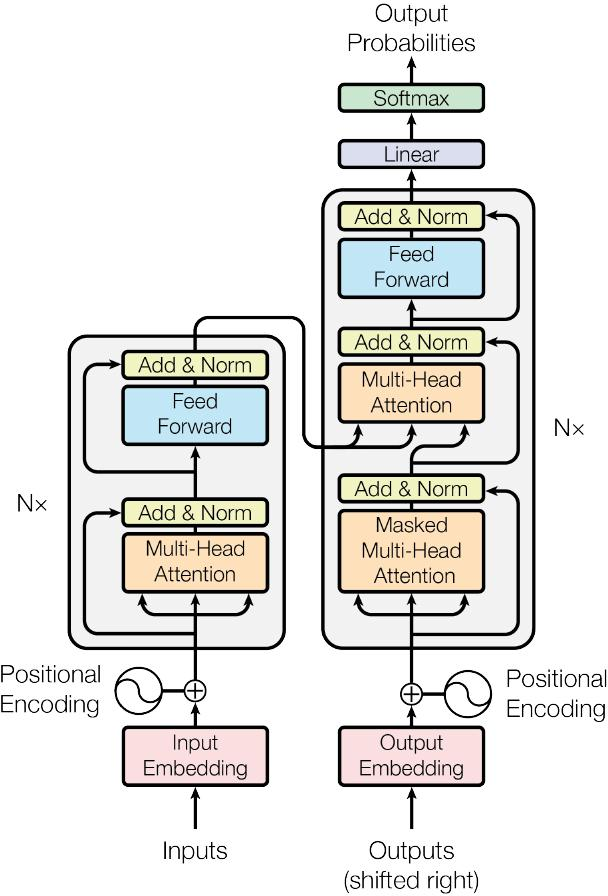

In [17]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[0])

In [41]:
from pydantic import BaseModel, Field

class NodeSummaryResponse(BaseModel):
    """
    Response model for summary object of a node 
    """
    summary: str = Field(
        ...,
        description="A concise summary of the table or text. 5 sentences max.")

SYSTEM_PROMPT = """
You are an expert assistant tasked with summarizing text and tables.
"""

class NodeSummariser:
    """
    Enhanced document summariser
    """
    def __init__(self, client):
        self.client = client

    def summarise(self, document_text: str) -> tuple[NodeSummaryResponse, dict]:
        """
        Summarise a document text
        """
        try:
            summary, completion = self.client.chat.completions.create_with_completion(
                system=SYSTEM_PROMPT,
                messages=[
                    {
                        "role": "user",
                        "content": f"Give a very concise summary of the following text or table: {document_text}. \
                            Respond only with the summary, no additionnal comment. Do not start your message by \
                            saying 'Here is a summary' or anything like that. Just give the summary as it is. Don't even \
                            mention the title of the source."
                    }
                    ],
                response_model = NodeSummaryResponse
            )

            return summary, completion
        except Exception as e:
            return e

In [19]:
from dotenv import load_dotenv

load_dotenv(verbose=True, dotenv_path=".env")

True

In [44]:
import os
import anthropic
import instructor

client = anthropic.AnthropicBedrock(
    aws_access_key=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    aws_session_token=os.getenv("AWS_SESSION_TOKEN"),
    aws_region=os.getenv("AWS_DEFAULT_REGION"),
)

MODEL_ID_HAIKU = "anthropic.claude-3-haiku-20240307-v1:0"
MODEL_ID_SONNET = "anthropic.claude-3-5-sonnet-20241022-v2:0"
USE_MODEL = MODEL_ID_SONNET
# USE_MODEL = MODEL_ID_HAIKU

# Regarding the LLM model choice, I would start with the cheapest option (Haiku) first. Depending on the tasks, the smallest 
# model might be sufficient. You will have to do some trial and error here. I found that the smallest model at times will have
# difficulty following certain instructions. For example, asking the LLM to summarise a body of text and constraining the
# summary say from minimum 100 and maximum 500 characters, the smallest model will sometimes fail to generate a summary
# that is within the character count constraints. In such cases, you might have to try a larger model.

# we are using Instructor (https://github.com/instructor-ai/instructor)
instructor_client = instructor.from_anthropic(
    client,
    max_tokens=1024,
    model=USE_MODEL
)



In [45]:
from pydantic import BaseModel

# Define your desired output structure
class UserInfo(BaseModel):
    name: str
    age: int

user_info = instructor_client.chat.completions.create(
    response_model=UserInfo,
    messages=[{"role": "user", "content": "John Doe is 30 years old."}]
    )

print(user_info.name)
#> John Doe
print(user_info.age)
#> 30

John Doe
30


In [47]:
from IPython.display import Markdown, display

for i, item in enumerate(composites):
    node, _ = NodeSummariser(instructor_client).summarise(item)
    display(Markdown(f"**Node {i+1}**:"))
    display(Markdown(node.summary))

**Node 1**:

This seminal paper introduces the Transformer architecture, which relies solely on attention mechanisms without using recurrent or convolutional neural networks. The model achieved state-of-the-art results in machine translation tasks, scoring 28.4 BLEU for English-to-German and 41.8 BLEU for English-to-French translation. The Transformer proved more efficient to train than previous models, requiring only 3.5 days on eight GPUs for the English-to-French task. The architecture demonstrated strong generalization capabilities, performing well on English constituency parsing. The work was a collaborative effort among researchers primarily from Google Brain and Google Research.

**Node 2**:

The text introduces the Transformer architecture as a groundbreaking approach in sequence modeling that completely replaces traditional recurrent neural networks with self-attention mechanisms. While recurrent models process sequences sequentially, limiting parallelization, and convolutional approaches struggle with long-range dependencies, the Transformer can model relationships between any input positions in constant time. The architecture achieves state-of-the-art translation results with significantly improved training efficiency on parallel hardware. This innovative model represents the first transduction architecture solely relying on self-attention for computing input and output representations, without using RNNs or convolution.

**Node 3**:

The text describes the architecture of the Transformer model, which follows an encoder-decoder structure. The encoder maps input sequences to continuous representations using 6 identical layers, each containing multi-head self-attention and feed-forward networks with residual connections. The decoder similarly uses 6 layers but adds a third sub-layer for multi-head attention over the encoder output. Both components operate with a dimension of 512, and the decoder includes masking to ensure predictions only depend on previous outputs.

**Node 4**:

The text describes attention mechanisms in neural networks, focusing on Scaled Dot-Product Attention. Attention functions map queries and key-value pairs to outputs through weighted sums. The authors introduce their version called "Scaled Dot-Product Attention" which computes dot products between queries and keys, divides by √dk, and applies softmax to obtain weights. This method is compared to additive attention, with dot-product attention being faster and more space-efficient due to optimized matrix multiplication. The scaling factor 1/√dk is introduced to prevent extremely small gradients in the softmax function when dk is large.

**Node 5**:

Multi-head attention projects queries, keys, and values h times with different linear projections, performing attention functions in parallel. The model uses 8 parallel attention heads, with each head working in reduced dimensionality of 64. The approach is implemented in three ways: encoder-decoder attention allowing decoder positions to attend to input sequences, self-attention in the encoder enabling all positions to attend to previous layer positions, and masked self-attention in the decoder permitting positions to attend to previous positions while preventing leftward information flow.

**Node 6**:

The text describes key components of a neural network architecture. Each layer contains a position-wise feed-forward network with two linear transformations and ReLU activation, processing inputs with dimensionality dmodel=512 and inner-layer dimensionality dff=2048. The model uses learned embeddings for input/output tokens and shares weights between embedding layers and pre-softmax transformation. To handle sequence order without recurrence or convolution, positional encodings using sine and cosine functions are added to input embeddings, allowing the model to learn relative positions and potentially extrapolate to longer sequences.

**Node 7**:

The text compares self-attention layers with recurrent and convolutional layers in sequence transduction tasks based on three criteria: computational complexity, parallelization capability, and path length between dependencies. Self-attention layers show advantages in connecting all positions with constant sequential operations, while being computationally efficient for sequences shorter than representation dimensionality. Compared to convolutional layers, self-attention achieves full connectivity more efficiently and matches separable convolution's complexity when combined with feed-forward layers. Additionally, self-attention offers better model interpretability through analyzable attention distributions.

**Node 8**:

The text describes training procedures for language models on WMT 2014 datasets, using 8 NVIDIA P100 GPUs. Base models trained for 100,000 steps (12 hours), while bigger models needed 300,000 steps (3.5 days). The Adam optimizer was used with a varying learning rate formula. Training involved three types of regularization, including residual dropout and label smoothing. The Transformer model achieved superior BLEU scores compared to previous models while requiring fewer computational resources.

**Node 9**:

The Transformer model achieved state-of-the-art results in machine translation, with the big model scoring 28.4 BLEU on English-to-German and 41.0 BLEU on English-to-French WMT 2014 tasks. Training was completed in 3.5 days using 8 P100 GPUs, requiring significantly less training cost than previous models. The researchers used beam search with specific parameters and averaged multiple checkpoints for both base and big models. Various architectural variations were tested on the English-to-German translation task to evaluate different components' importance.

**Node 10**:

The text discusses experimental results for transformer models in language tasks. Various configurations of attention heads and dimensions were tested, showing that single-head attention underperforms while too many heads also reduce quality. The transformer model was also evaluated on English constituency parsing, performing exceptionally well with both WSJ-only training (91.3 F1) and semi-supervised learning (92.7 F1), outperforming most previous models including the BerkeleyParser, despite minimal task-specific tuning.

**Node 11**:

The Transformer is introduced as the first sequence transduction model based entirely on attention, replacing recurrent layers with multi-headed self-attention in encoder-decoder architectures. It achieves state-of-the-art results on WMT 2014 English-to-German and English-to-French translation tasks while being significantly faster to train than recurrent or convolutional architectures. The authors plan to extend the model to non-text modalities and develop local attention mechanisms for handling large inputs like images, audio and video. The model's code is available on GitHub, and acknowledgments are given to collaborators who provided feedback.

**Node 12**:

The images demonstrate attention mechanism visualizations in a neural network, specifically from layer 5 of a 6-layer encoder. The visualizations show how different attention heads track long-distance dependencies, perform anaphora resolution, and capture sentence structure. One example highlights how multiple attention heads follow the relationship between 'making' and 'more difficult', while another shows heads 5 and 6 focusing on resolving references with the word 'its'. Multiple heads learned distinct, specialized tasks related to sentence structure analysis.

In [48]:
for i, item in enumerate(tables_info):
    node, _ = NodeSummariser(instructor_client).summarise(item)
    display(Markdown(f"**Table {i+1} Summary**:"))
    display(Markdown(node.summary))

**Table 1 Summary**:

The table compares different layer types in neural architectures based on their computational characteristics. Self-attention has O(n²-d) complexity per layer with O(1) sequential operations and maximum path length. Recurrent layers show O(n-d²) complexity with O(n) sequential operations and path length. Convolutional layers have O(k-n-d²) complexity with O(1) sequential operations and O(log(n)) maximum path length. Restricted self-attention demonstrates O(r-n-d) complexity with O(1) sequential operations and O(n/r) maximum path length.

**Table 2 Summary**:

This table compares various machine translation models and their performance metrics across English-German (EN-DE) and English-French (EN-FR) translation tasks. The Transformer models, particularly the big variant, demonstrate superior BLEU scores compared to other architectures like ByteNet, GNMT, and ConvS2S. The big Transformer achieves 28.4 for EN-DE and 41.8 for EN-FR, marking the highest scores in both language pairs. Training costs and computational requirements are also documented, showing significant variations across different models.

**Table 3 Summary**:

The table appears to be a benchmark or experiment results comparing different model configurations. It contains parameters such as batch size, dimensions, learning rates and related metrics. The baseline model uses parameters like batch size 6, dimensions 512/2048, and learning rate 0.1. Multiple variations (labeled A through E) test different values for these parameters, showing their impact on performance metrics. The "big" model configuration uses larger dimensions (1024/4096) and more training data (300K vs 100K).

**Table 4 Summary**:

The table compares parsing performance (WSJ 23 F1 scores) across different models under various training conditions. Models trained only with WSJ discriminative data show scores ranging from 88.3 to 91.7. Semi-supervised training methods improve performance with scores between 91.3 and 92.7. The highest scores are achieved by multi-task (93.0) and generative (93.3) approaches, with Dyer et al. (2016) achieving the top result.